### IMPORT LIBRERIE

In [2]:
import pickle 
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
from keras.regularizers import l1_l2,l2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from keras.layers import Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.layers import LeakyReLU
from sklearn.metrics import classification_report
from keras.regularizers import l2


Using TensorFlow backend.


### IMPORT DATASET

In [3]:
X_train_M = pickle.load(open("C:/Users/1995m/OneDrive/Desktop/x_train.obj","rb"))

X_test_M = pickle.load(open("C:/Users/1995m/OneDrive/Desktop/x_test.obj","rb"))

Y_train_M = pickle.load(open("C:/Users/1995m/OneDrive/Desktop/y_train.obj","rb"))

### ESPLORAZIONE E PREPROCESSING

In [4]:
X_train_M.shape

(14000, 28, 28)

In [5]:
unique, counts = np.unique(Y_train_M, return_counts=True)
d=dict(zip(unique, counts))
d

{16: 1295,
 17: 1265,
 18: 1346,
 19: 1329,
 20: 1336,
 21: 1297,
 22: 1269,
 23: 1327,
 24: 1322,
 25: 1321,
 26: 893}

### SPLIT TRAIN E VALIDATION SET

In [0]:
x_train,x_val,y_train,Y_val=train_test_split(X_train_M,Y_train_M)

In [7]:
Y_val

array([16, 20, 25, ..., 22, 24, 21], dtype=uint8)

In [8]:
num_classes=len(d)

num_classes

11

### CATEGORIZZAZIONE

In [0]:
y_train = to_categorical((y_train-16), num_classes)

In [0]:
y_val = to_categorical((Y_val-16), num_classes)

### NORMALIZZAZIONE E RESHAPE

In [11]:
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
print(x_train.shape)
print(x_val.shape)

(10500, 784)
(3500, 784)


### MODELLO

In [0]:
adam = optimizers.Adam()

In [13]:
model = Sequential()

model.add(Dense(512, input_dim=x_train.shape[1],activation="relu",kernel_regularizer=l2(0.005)))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu",kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dropout(0.4))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
network_history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=512 ,epochs=200)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 10500 samples, validate on 3500 samples
Epoch 1/200


10500/10500 [==============================] - 1s 117us/step - loss: 9.2788 - acc: 0.5101 - val_loss: 7.1015 - val_acc: 0.7266
Epoch 2/200
10500/10500 [==============================] - 0s 21us/step - loss: 6.0421 - acc: 0.7289 - val_loss: 4.8104 - val_acc: 0.7783
Epoch 3/200
10500/10500 [==============================] - 0s 20us/step - loss: 4.1208 - acc: 0.7695 - val_loss: 3.3175 - val_acc: 0.7897
Epoch 4/200
10500/10500 [==============================] - 0s 21us/step - loss: 2.8757 - acc: 0.7929 - val_loss: 2.3702 - val_acc: 0.8043
Epoch 5/200
10500/10500 [==============================] - 0s 20us/step - loss: 2.1312 - acc: 0.8033 - val_loss: 1.8357 - val_acc: 0.8166
Epoch 6/200
10500/10500 [================

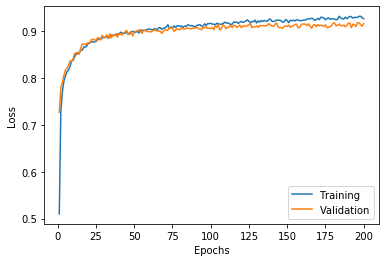

In [14]:
x_plot = list(range(1,201))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_plot, network_history.history['acc'])
plt.plot(x_plot, network_history.history['val_acc'])
plt.legend(['Training', 'Validation'])


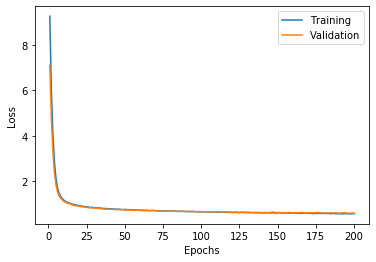

In [15]:
x_plot = list(range(1,201))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_plot, network_history.history['loss'])
plt.plot(x_plot, network_history.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [0]:
y_pred=model.predict_classes(x_val)


In [0]:
Y_val=Y_val-16


In [18]:
Y_val

array([0, 4, 9, ..., 6, 8, 5], dtype=uint8)

### VALUTAZIONE PERFORMANCE

In [19]:
cm=confusion_matrix(Y_val,y_pred)
prf=precision_recall_fscore_support(Y_val,y_pred)

print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")

confusion matrix
 [[312   9   6   0   2   1   2   4   0   3   0]
 [  4 297   4   4   3   8   1   5   3   5   1]
 [  6   3 310   0   1   3   4   2   5   1   2]
 [  0   1   3 317   2   1   0   1   2   1   1]
 [  1   3  11   1 294   0   1   0   6   5   5]
 [  0   1   0   1   0 292  16   7   3   0   0]
 [  0   1   2   0   1  14 292   4   0   2   1]
 [  0   0   1   0   0   5   6 296   2   0   0]
 [  0   0   1   0   2   2   5   4 322   9   2]
 [  0   3   3   1   7   7  21   3   7 284   1]
 [  1   0   1   2   4   2   0   3   1   0 188]]
precision
 [0.96296296 0.93396226 0.90643275 0.97239264 0.93037975 0.87164179
 0.83908046 0.89969605 0.91737892 0.91612903 0.93532338]
recall
 [0.92035398 0.88656716 0.91988131 0.96352584 0.89908257 0.9125
 0.92113565 0.95483871 0.92795389 0.84272997 0.93069307]
f-score
 [0.94117647 0.90964778 0.91310751 0.96793893 0.91446345 0.89160305
 0.87819549 0.92644757 0.9226361  0.87789799 0.93300248]


In [20]:
cr=classification_report(Y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       339
           1       0.93      0.89      0.91       335
           2       0.91      0.92      0.91       337
           3       0.97      0.96      0.97       329
           4       0.93      0.90      0.91       327
           5       0.87      0.91      0.89       320
           6       0.84      0.92      0.88       317
           7       0.90      0.95      0.93       310
           8       0.92      0.93      0.92       347
           9       0.92      0.84      0.88       337
          10       0.94      0.93      0.93       202

    accuracy                           0.92      3500
   macro avg       0.92      0.92      0.92      3500
weighted avg       0.92      0.92      0.92      3500



In [21]:
lettere = {
  0: "P",
  1: "Q",
  2: "R",
  3: "S",
  4: "T",
  5: "U",
  6: "V",
  7: "W",
  8: "X",
  9:"Y",
  10:"Z"
  }
print(lettere)

{0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U', 6: 'V', 7: 'W', 8: 'X', 9: 'Y', 10: 'Z'}


### VISIONE DEGLI ERRORI DI CLASSIFICAZIONE

lettera R classificata come U


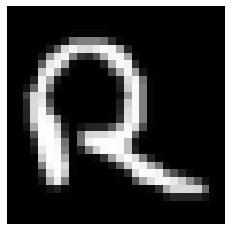

lettera U classificata come V


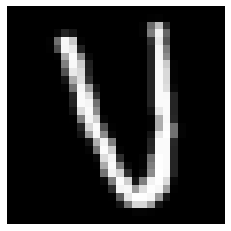

lettera Y classificata come T


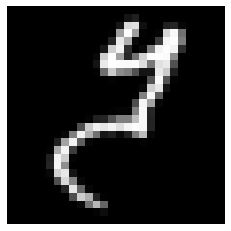

lettera Q classificata come U


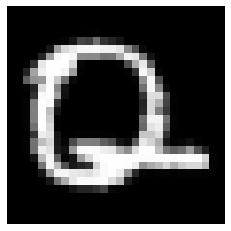

lettera Y classificata come V


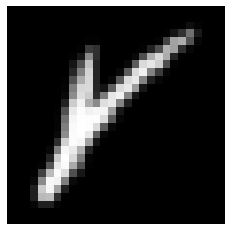

lettera Z classificata come U


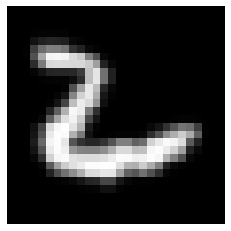

lettera V classificata come Y


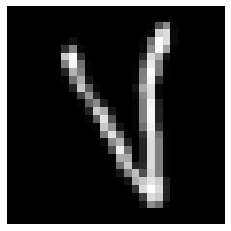

lettera P classificata come W


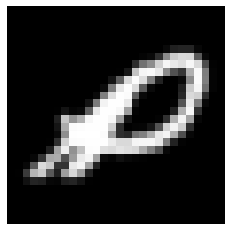

lettera P classificata come Q


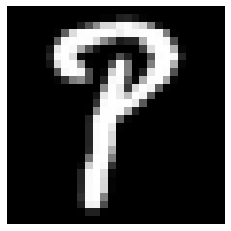

lettera Y classificata come V


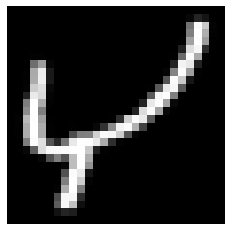

lettera X classificata come Z


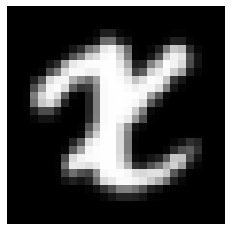

lettera U classificata come V


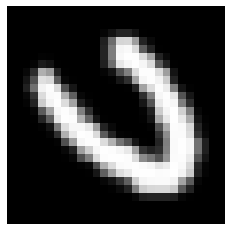

lettera S classificata come Z


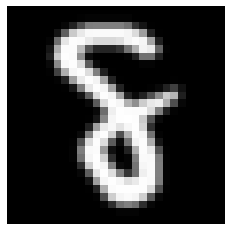

lettera Q classificata come W


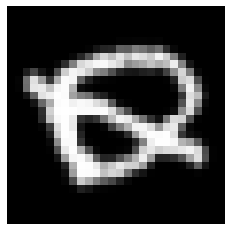

lettera Y classificata come Z


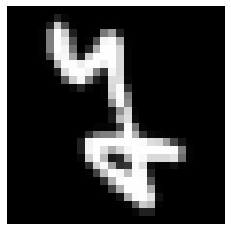

lettera W classificata come U


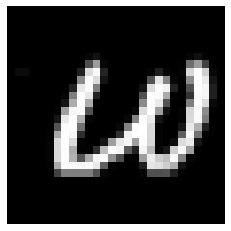

lettera X classificata come V


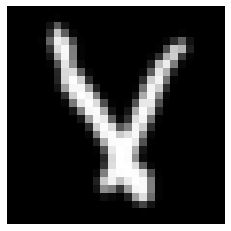

lettera T classificata come R


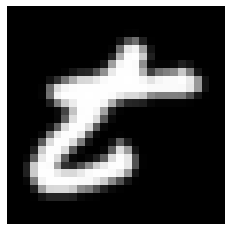

lettera X classificata come Y


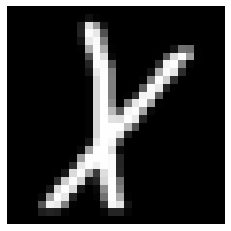

lettera W classificata come U


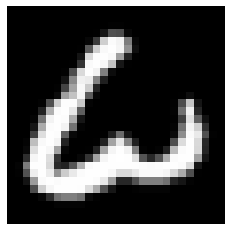

lettera Q classificata come U


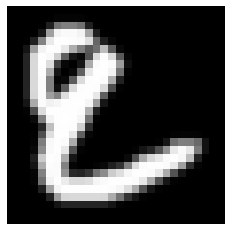

lettera V classificata come W


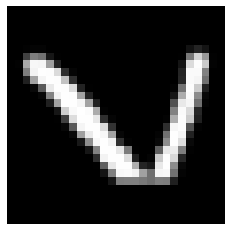

lettera Y classificata come V


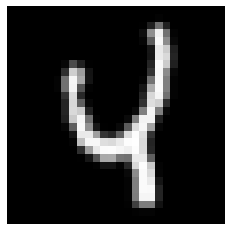

lettera V classificata come U


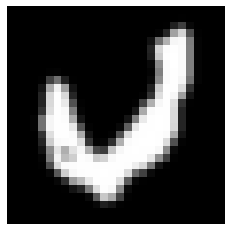

lettera P classificata come R


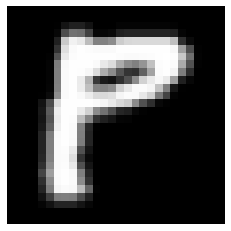

lettera P classificata come Q


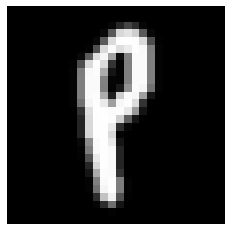

lettera R classificata come Z


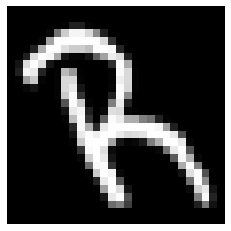

lettera Y classificata come V


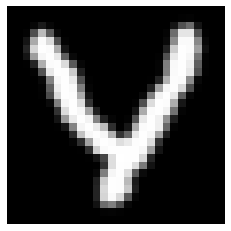

lettera P classificata come R


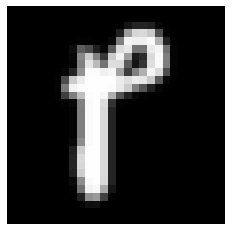

lettera X classificata come Y


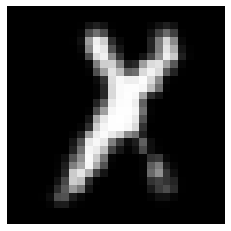

lettera R classificata come P


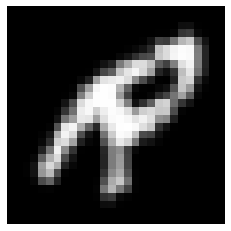

lettera Z classificata come U


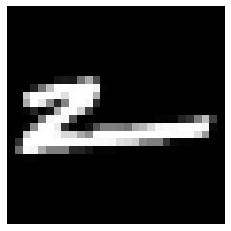

lettera Y classificata come U


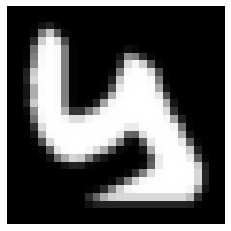

lettera W classificata come U


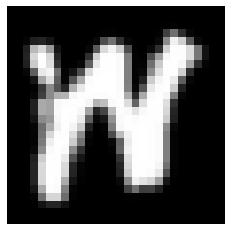

lettera P classificata come Q


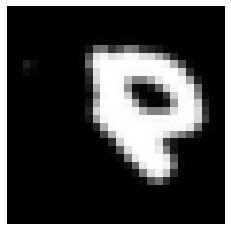

lettera Y classificata come Q


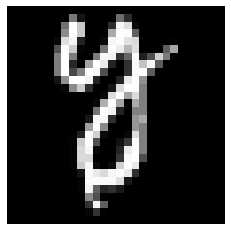

lettera U classificata come V


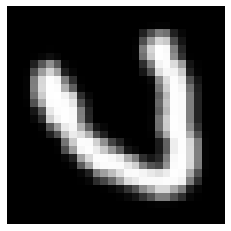

lettera Y classificata come V


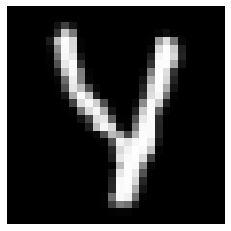

lettera X classificata come Y


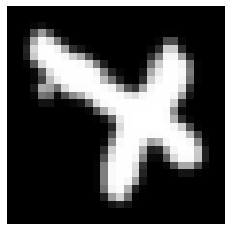

lettera P classificata come Y


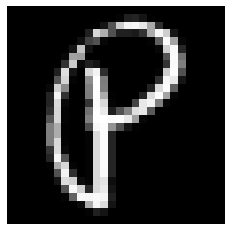

lettera Q classificata come P


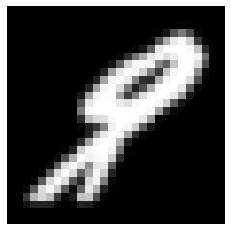

lettera P classificata come Q


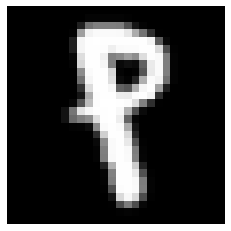

lettera Y classificata come Q


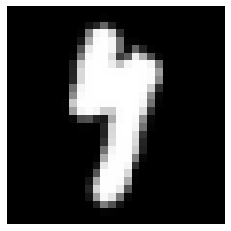

lettera Q classificata come U


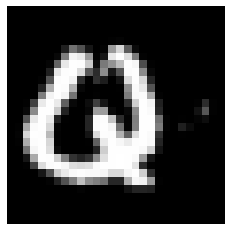

lettera Q classificata come U


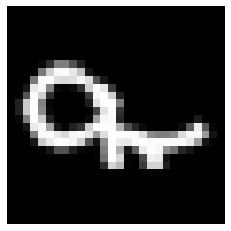

lettera P classificata come V


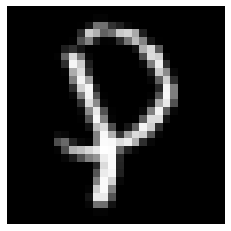

lettera P classificata come T


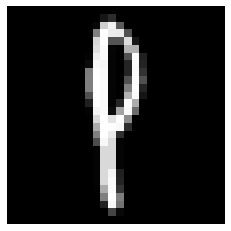

lettera Y classificata come W


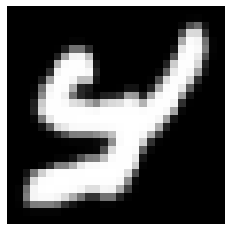

lettera R classificata come W


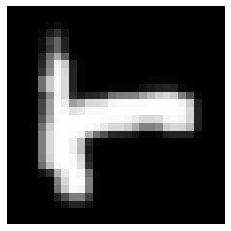

lettera X classificata come Y


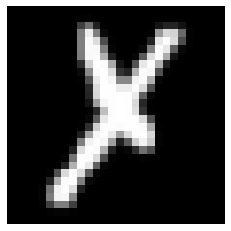

lettera S classificata come R


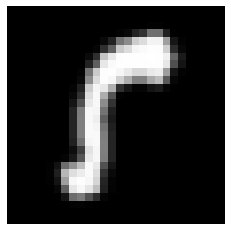

lettera S classificata come X


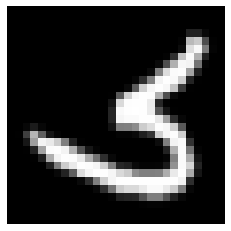

lettera P classificata come Y


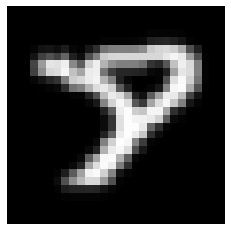

lettera R classificata come W


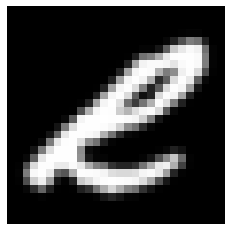

lettera T classificata come X


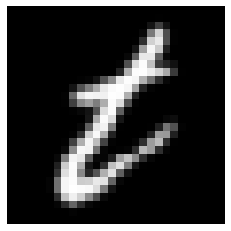

lettera Q classificata come S


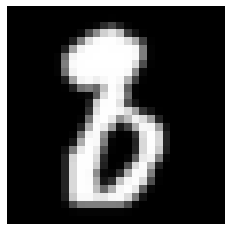

lettera U classificata come V


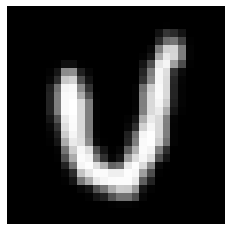

lettera Y classificata come R


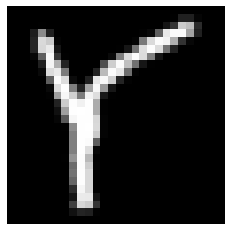

lettera W classificata come R


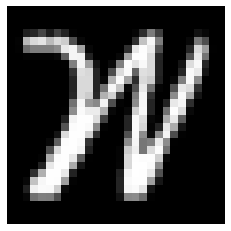

lettera T classificata come P


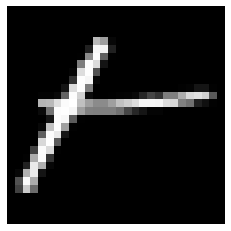

lettera T classificata come X


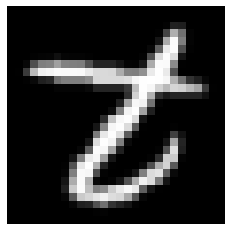

lettera Y classificata come V


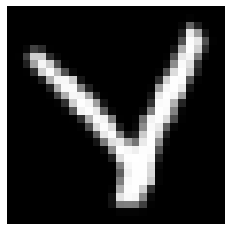

lettera Z classificata come P


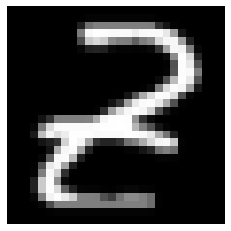

lettera X classificata come U


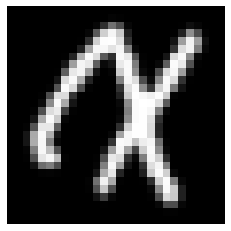

lettera Y classificata come V


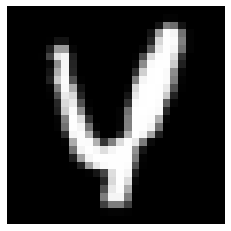

lettera R classificata come X


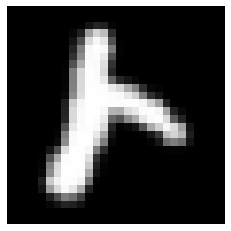

lettera T classificata come Y


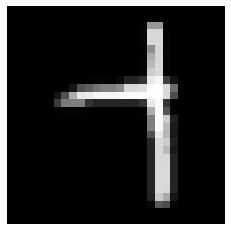

lettera P classificata come Q


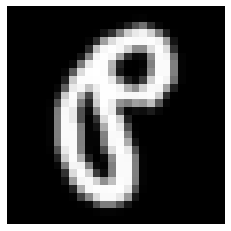

lettera X classificata come Y


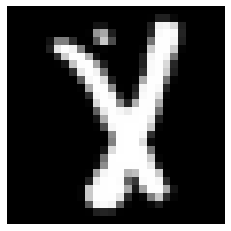

lettera U classificata come V


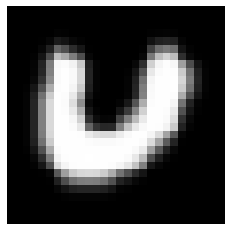

lettera Z classificata come T


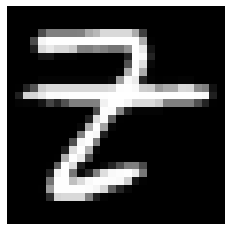

lettera U classificata come V


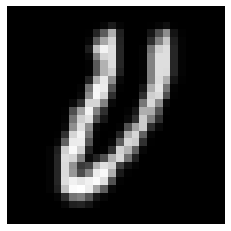

lettera T classificata come Y


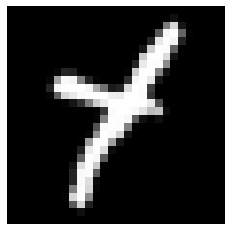

lettera Y classificata come V


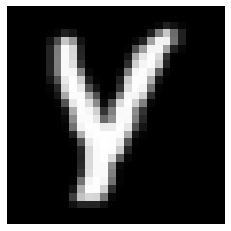

lettera P classificata come U


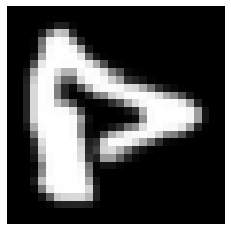

lettera Y classificata come W


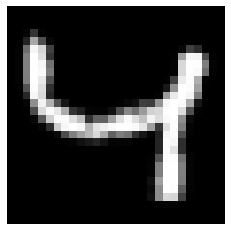

lettera Y classificata come V


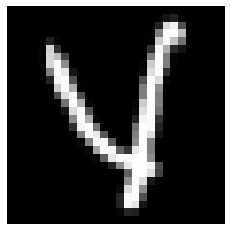

lettera Y classificata come V


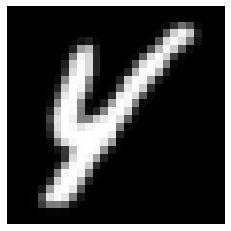

lettera V classificata come U


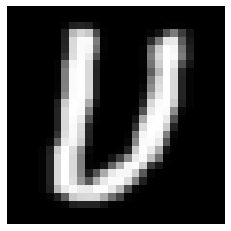

lettera Q classificata come Y


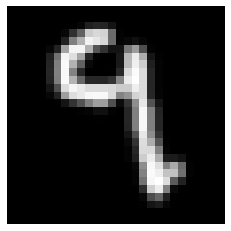

lettera S classificata come Q


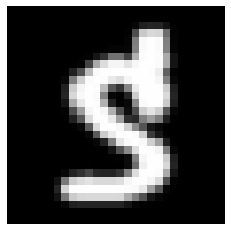

lettera U classificata come W


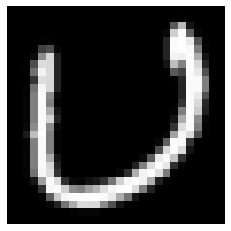

lettera R classificata come X


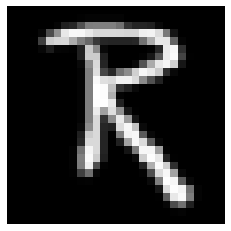

lettera Y classificata come Q


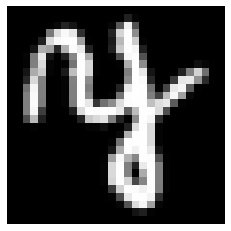

lettera R classificata come Q


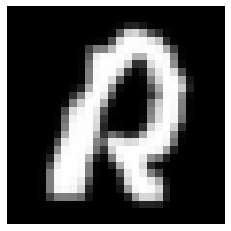

lettera Q classificata come Y


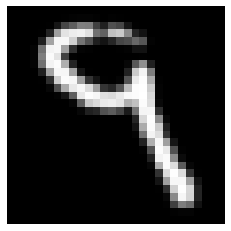

lettera W classificata come V


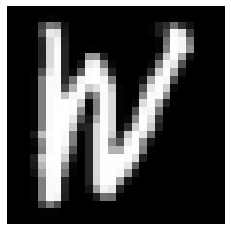

lettera T classificata come R


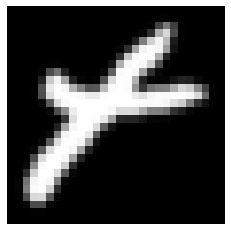

lettera Y classificata come T


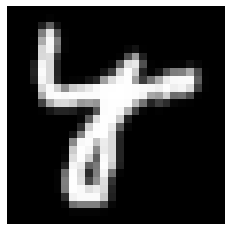

lettera R classificata come X


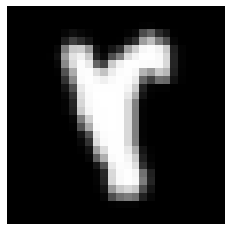

lettera R classificata come V


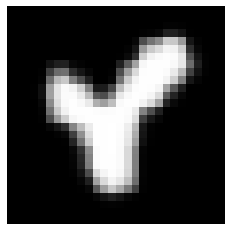

lettera X classificata come T


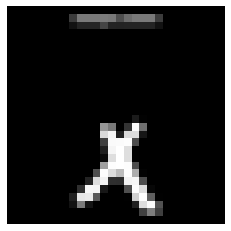

lettera Y classificata come X


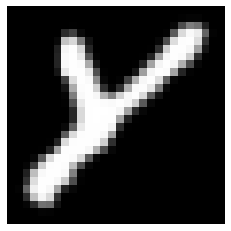

lettera T classificata come Q


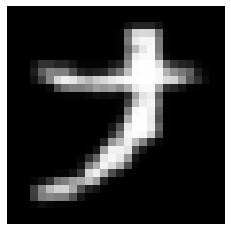

lettera Q classificata come X


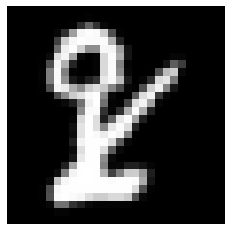

lettera T classificata come R


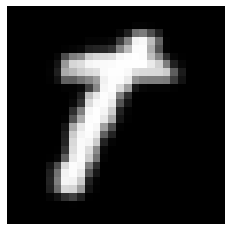

lettera Q classificata come T


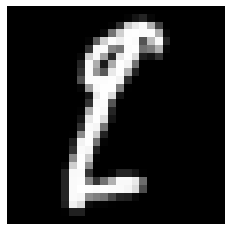

lettera Z classificata come R


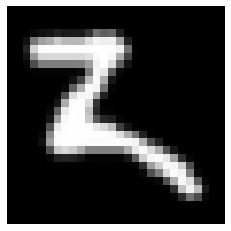

lettera X classificata come W


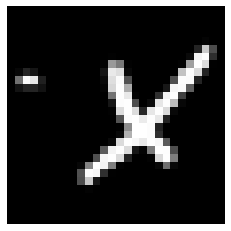

lettera P classificata come Q


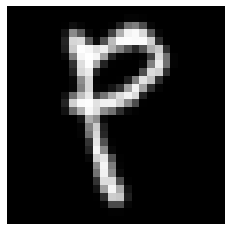

lettera V classificata come U


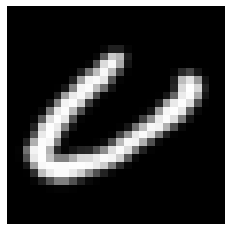

lettera X classificata come Y


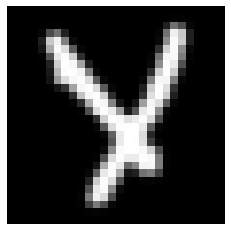

lettera X classificata come Y


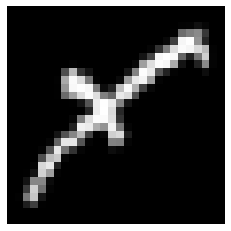

lettera Q classificata come S


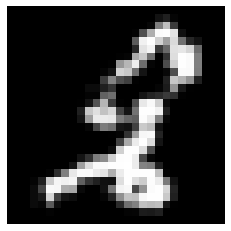

lettera R classificata come Q


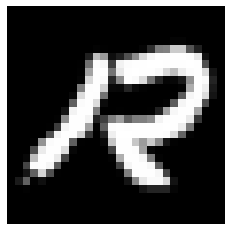

lettera Z classificata come T


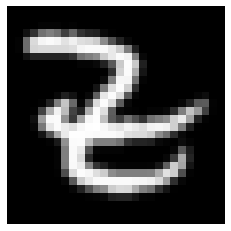

lettera W classificata come V


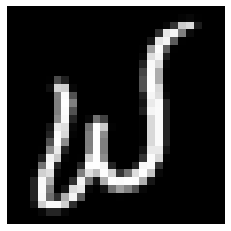

lettera V classificata come U


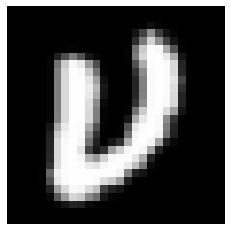

lettera P classificata come Y


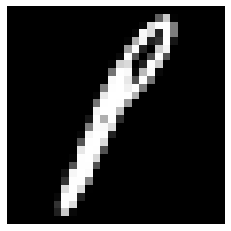

lettera Q classificata come R


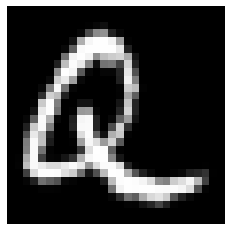

lettera U classificata come V


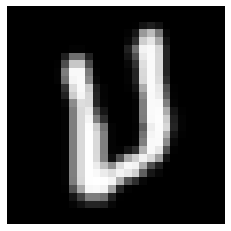

lettera U classificata come W


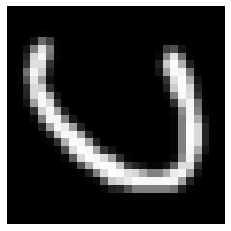

lettera W classificata come X


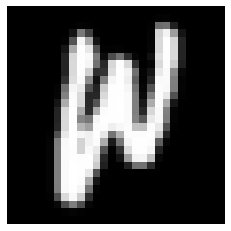

lettera U classificata come W


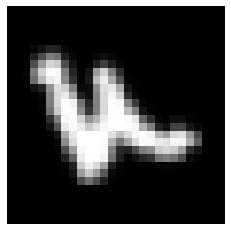

lettera U classificata come Q


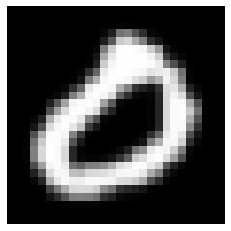

lettera T classificata come X


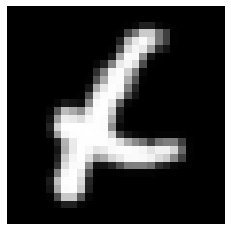

lettera U classificata come V


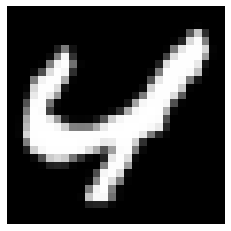

lettera S classificata come U


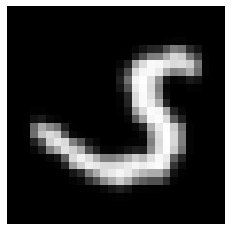

lettera T classificata come Y


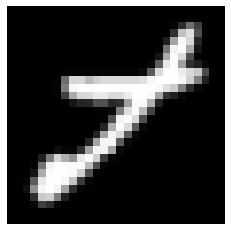

lettera Y classificata come T


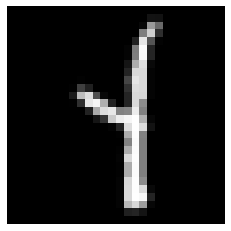

lettera Y classificata come U


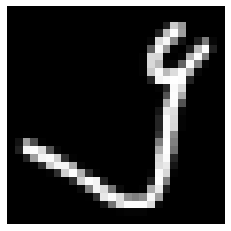

lettera W classificata come V


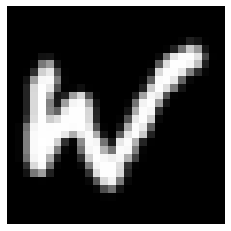

lettera Y classificata come T


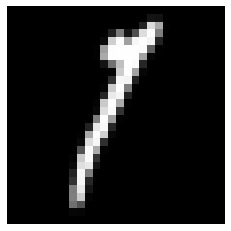

lettera X classificata come Y


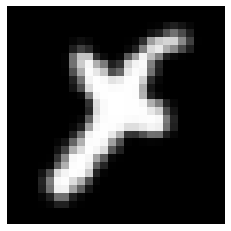

lettera Z classificata come S


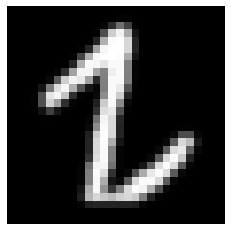

lettera X classificata come U


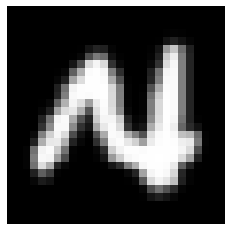

lettera Q classificata come P


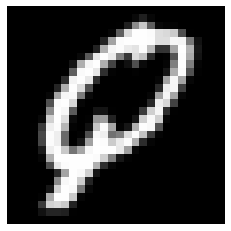

lettera P classificata come W


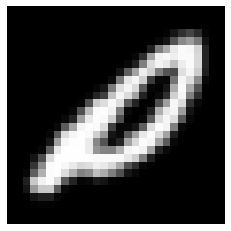

lettera Z classificata come S


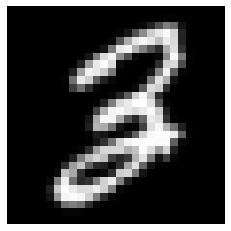

lettera Q classificata come Y


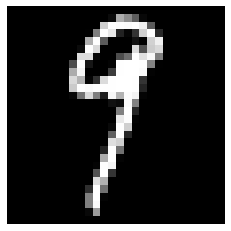

lettera Q classificata come T


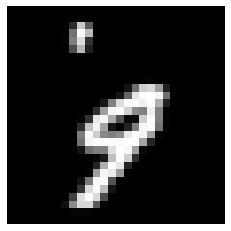

lettera V classificata come W


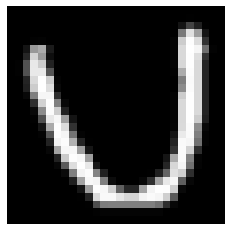

lettera Q classificata come W


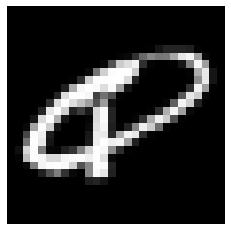

lettera U classificata come V


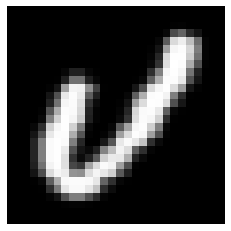

lettera Q classificata come T


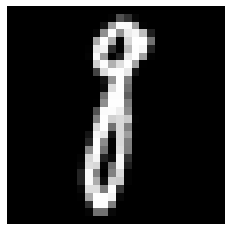

lettera R classificata come Q


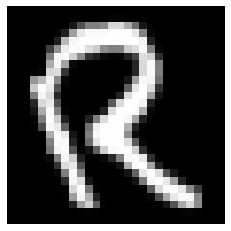

lettera Y classificata come V


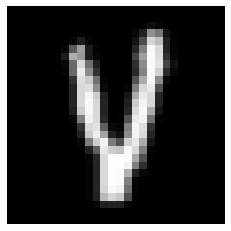

lettera T classificata come Y


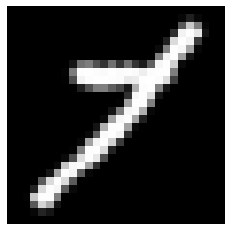

lettera W classificata come V


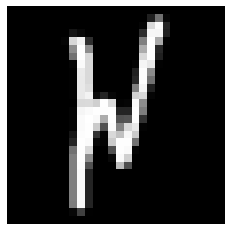

lettera Q classificata come R


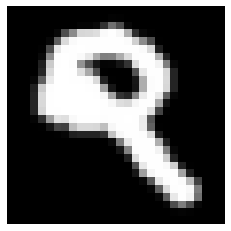

lettera Q classificata come W


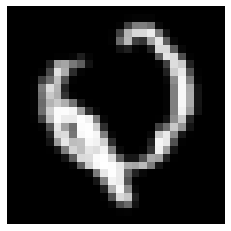

lettera V classificata come T


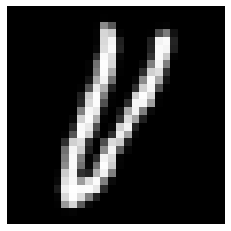

lettera P classificata come R


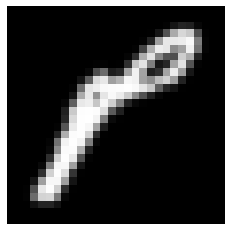

lettera Z classificata come T


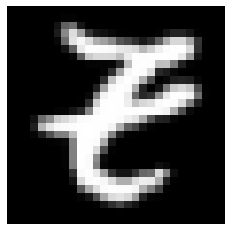

lettera R classificata come Z


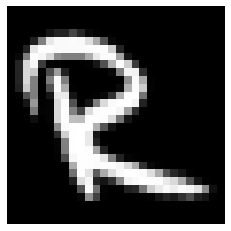

lettera Y classificata come T


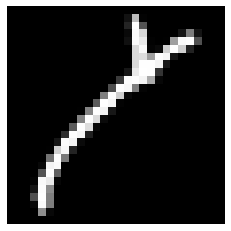

lettera X classificata come Z


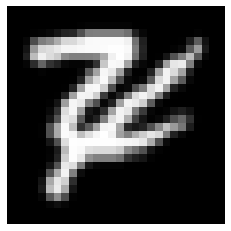

lettera P classificata come R


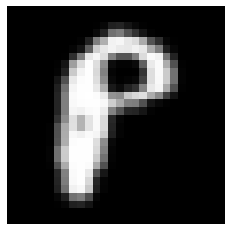

lettera P classificata come W


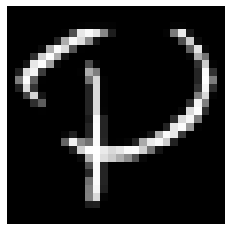

lettera P classificata come Q


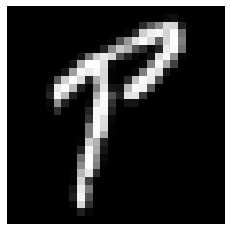

lettera T classificata come Q


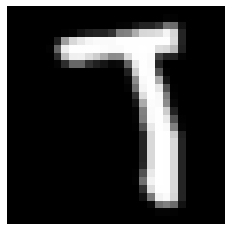

lettera Q classificata come U


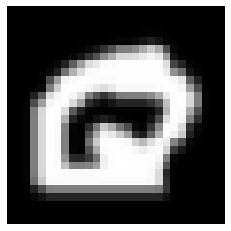

lettera Q classificata come W


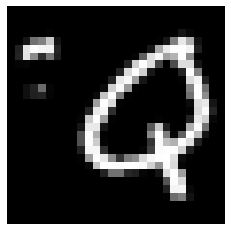

lettera S classificata come W


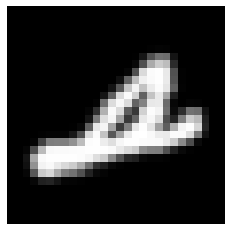

lettera Y classificata come U


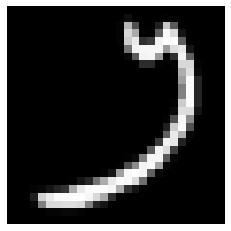

lettera U classificata come W


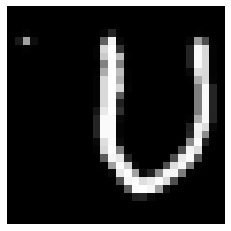

lettera U classificata come V


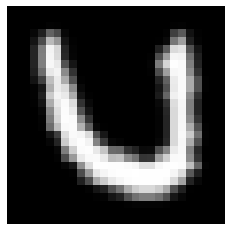

lettera R classificata come P


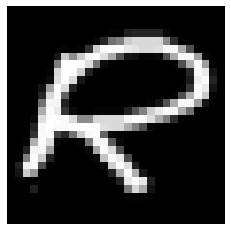

lettera Q classificata come R


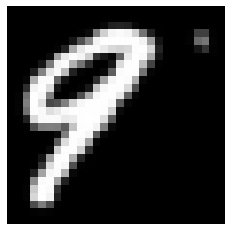

lettera T classificata come Q


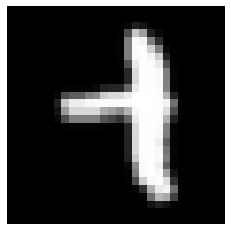

lettera P classificata come T


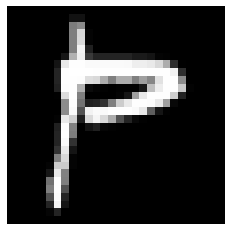

lettera V classificata come U


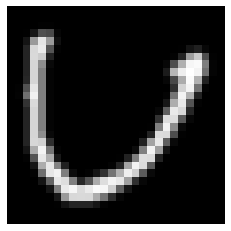

lettera R classificata come X


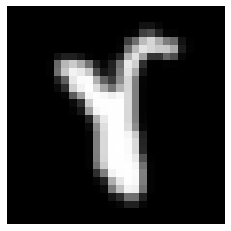

lettera U classificata come X


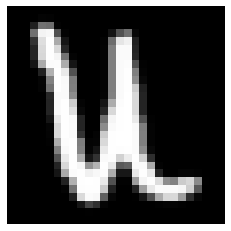

lettera T classificata come Z


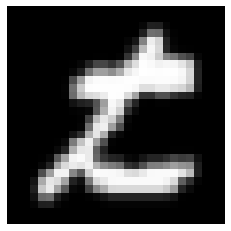

lettera Z classificata come W


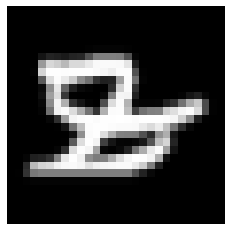

lettera T classificata come X


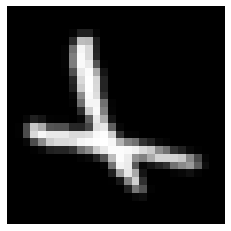

lettera P classificata come Q


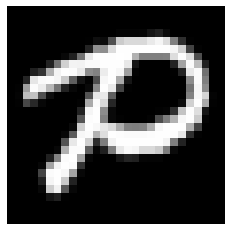

lettera T classificata come Y


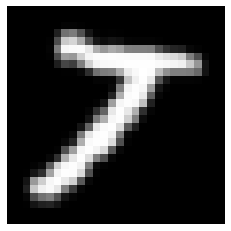

lettera V classificata come Z


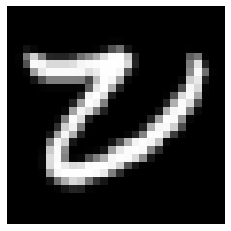

lettera Y classificata come X


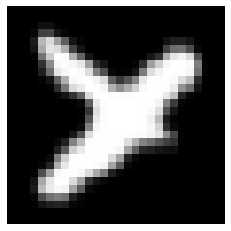

lettera Y classificata come X


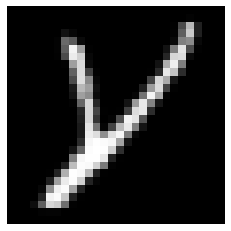

lettera U classificata come V


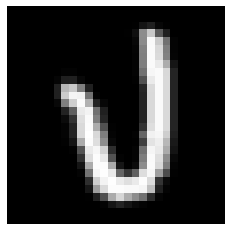

lettera R classificata come V


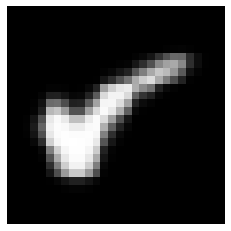

lettera Y classificata come V


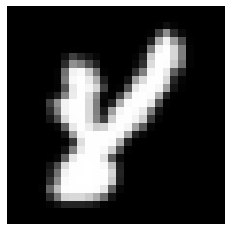

lettera Y classificata come V


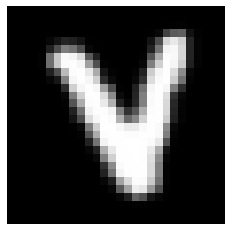

lettera Q classificata come S


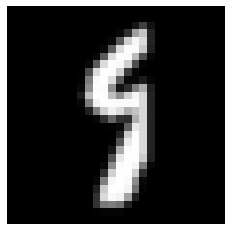

lettera Y classificata come T


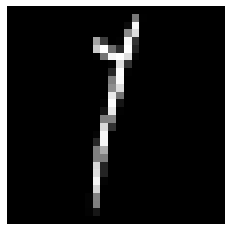

lettera U classificata come X


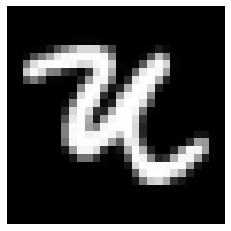

lettera Y classificata come U


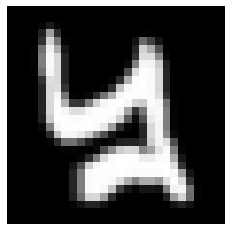

lettera V classificata come U


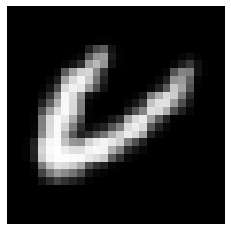

lettera V classificata come W


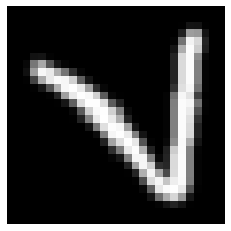

lettera Y classificata come V


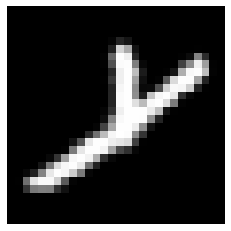

lettera Z classificata come T


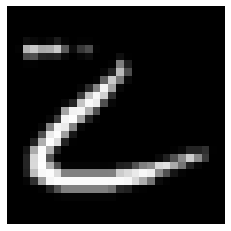

lettera U classificata come W


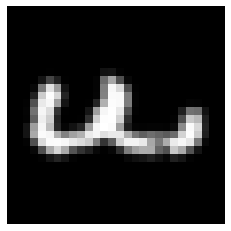

lettera Z classificata come W


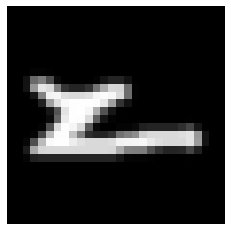

lettera Q classificata come Y


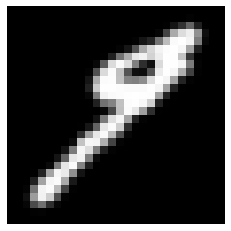

lettera R classificata come X


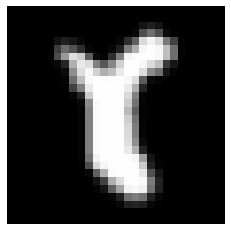

lettera Q classificata come P


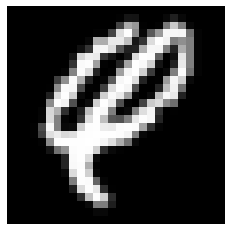

lettera V classificata come Y


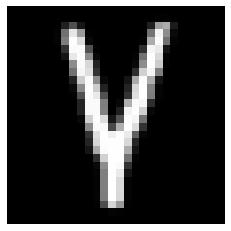

lettera R classificata come P


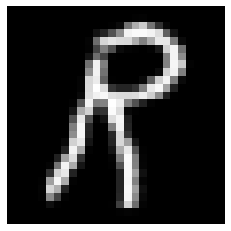

lettera T classificata come R


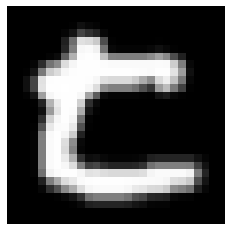

lettera T classificata come R


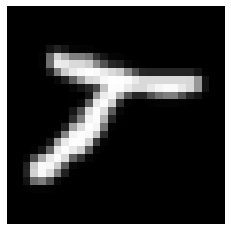

lettera V classificata come U


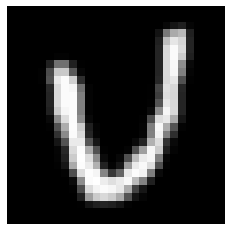

lettera Q classificata come P


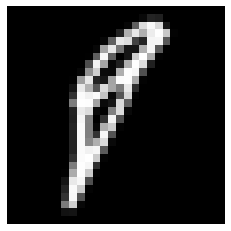

lettera S classificata come T


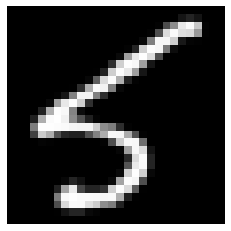

lettera S classificata come Y


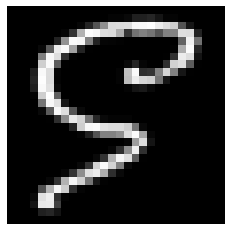

lettera Y classificata come R


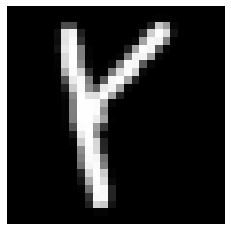

lettera X classificata come W


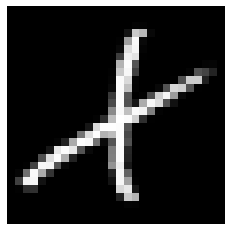

lettera V classificata come U


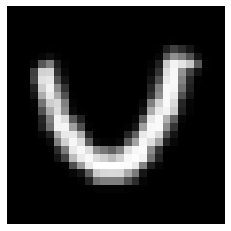

lettera V classificata come R


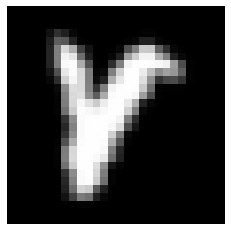

lettera Y classificata come V


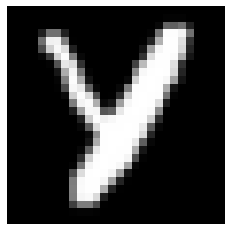

lettera W classificata come V


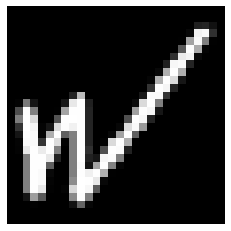

lettera T classificata come R


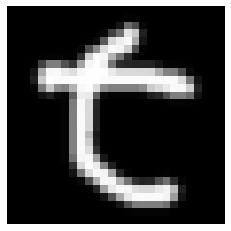

lettera V classificata come W


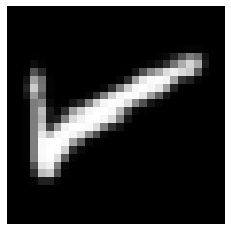

lettera Q classificata come W


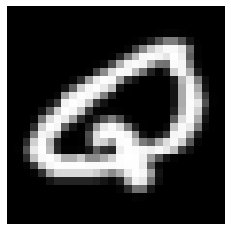

lettera T classificata come Z


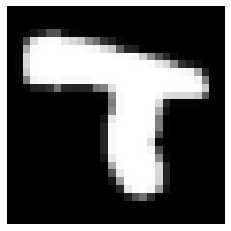

lettera U classificata come W


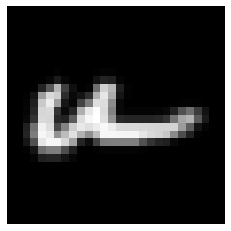

lettera T classificata come X


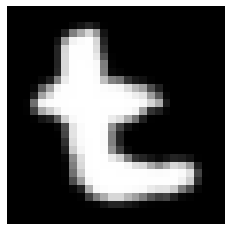

lettera Q classificata come U


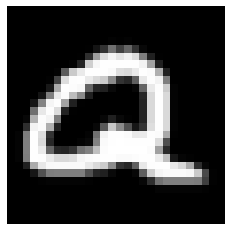

lettera Y classificata come W


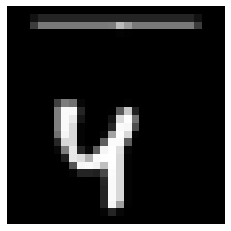

lettera V classificata come U


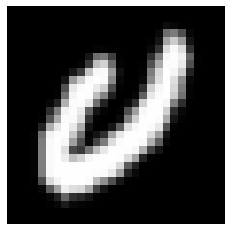

lettera T classificata come R


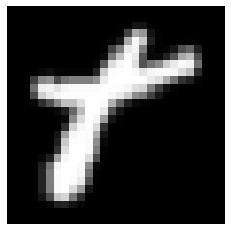

lettera S classificata come X


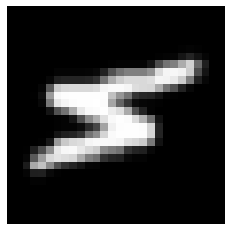

lettera P classificata come Q


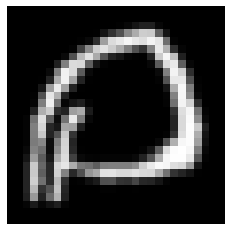

lettera Y classificata come V


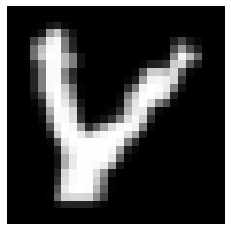

lettera Q classificata come Y


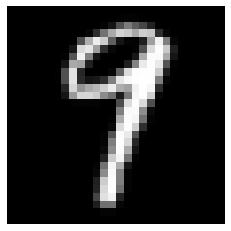

lettera Q classificata come U


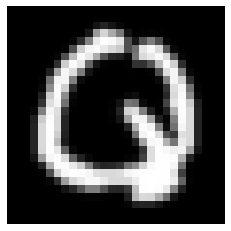

lettera R classificata come Y


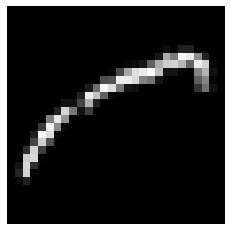

lettera W classificata come X


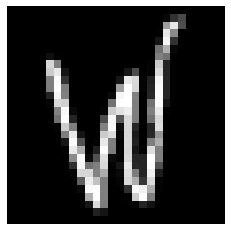

lettera T classificata come R


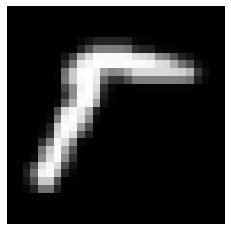

lettera Z classificata come W


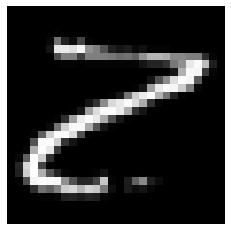

lettera U classificata come V


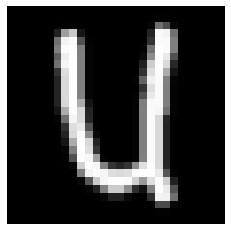

lettera T classificata come X


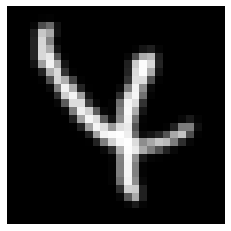

lettera V classificata come U


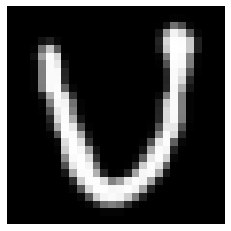

lettera P classificata come R


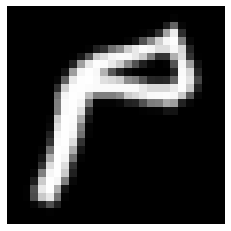

lettera T classificata come S


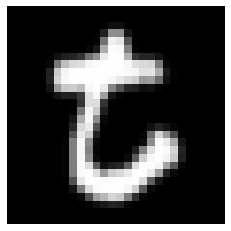

lettera Y classificata come U


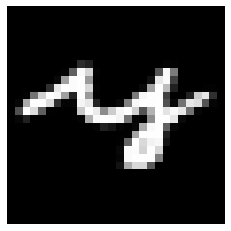

lettera T classificata come R


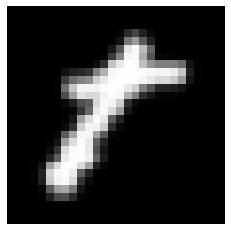

lettera T classificata come R


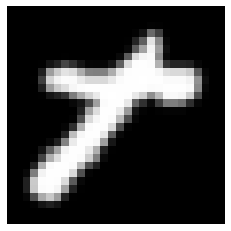

lettera Q classificata come U


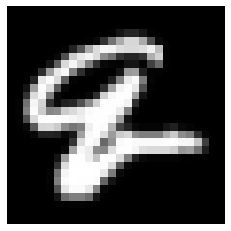

lettera Y classificata come U


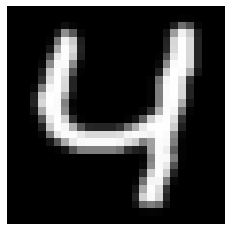

lettera X classificata come Y


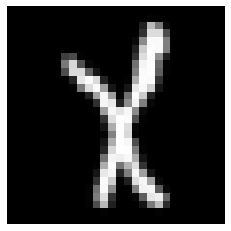

lettera Y classificata come V


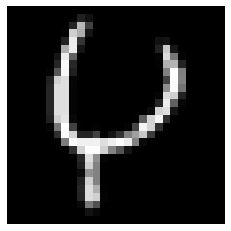

lettera X classificata come W


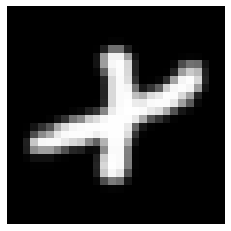

lettera U classificata come S


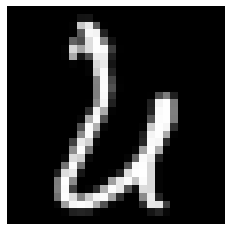

lettera Y classificata come X


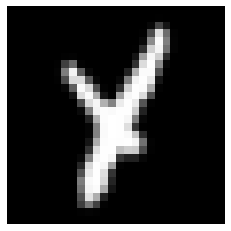

lettera W classificata come V


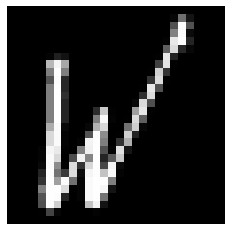

lettera Y classificata come V


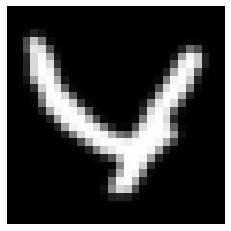

lettera Q classificata come Z


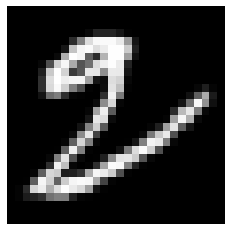

lettera P classificata come V


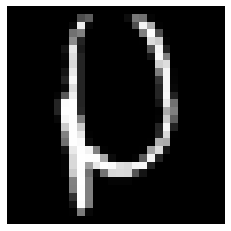

lettera R classificata come V


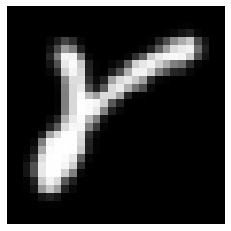

lettera Z classificata come X


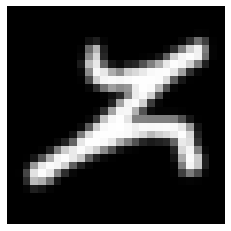

lettera Y classificata come V


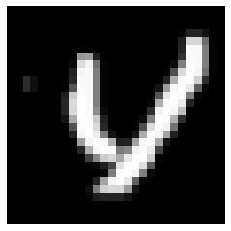

lettera U classificata come W


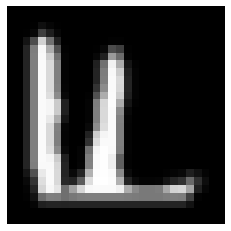

lettera R classificata come U


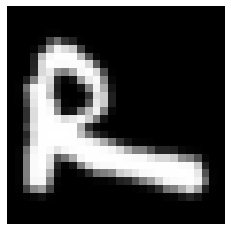

lettera U classificata come V


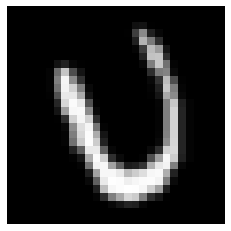

lettera Y classificata come V


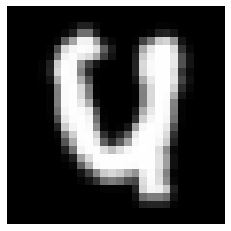

lettera R classificata come V


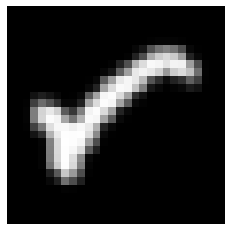

lettera X classificata come V


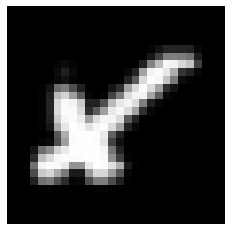

lettera U classificata come X


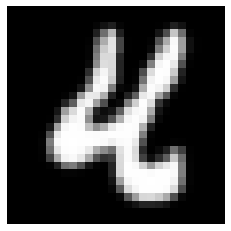

lettera Q classificata come X


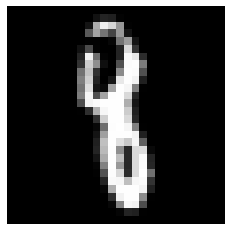

lettera V classificata come U


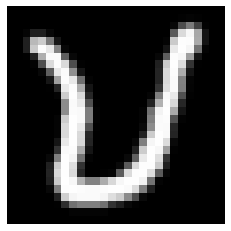

lettera U classificata come V


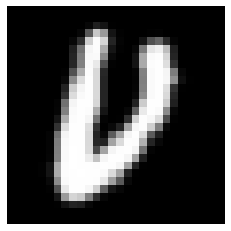

lettera S classificata come R


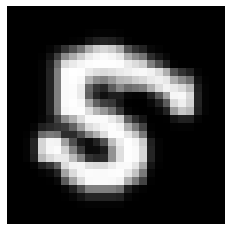

lettera Q classificata come S


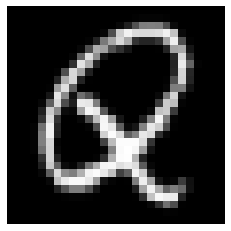

lettera V classificata come U


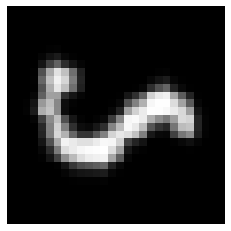

lettera X classificata come V


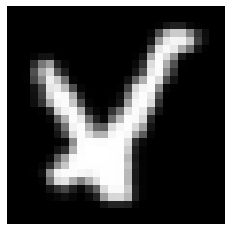

lettera Q classificata come X


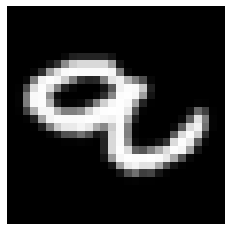

lettera R classificata come U


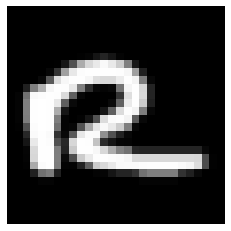

lettera Y classificata come T


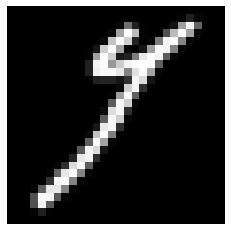

lettera W classificata come U


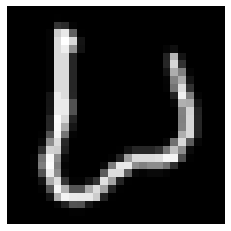

lettera T classificata come Z


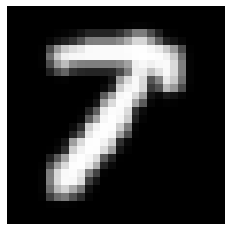

lettera Y classificata come U


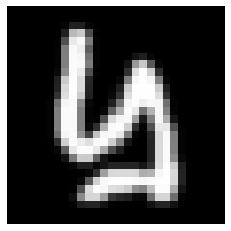

lettera U classificata come V


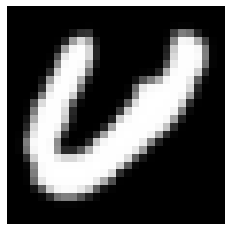

lettera R classificata come T


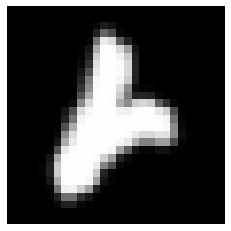

lettera S classificata come R


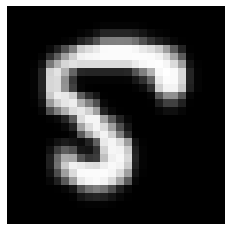

lettera Y classificata come X


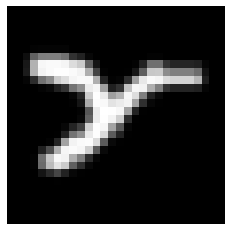

lettera P classificata come W


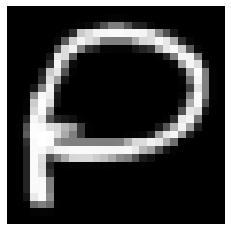

lettera X classificata come R


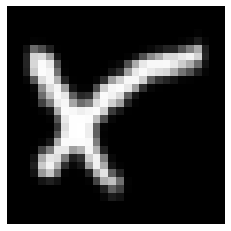

lettera X classificata come W


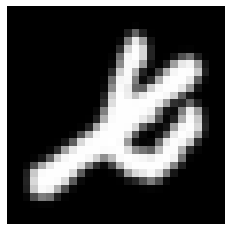

lettera U classificata come V


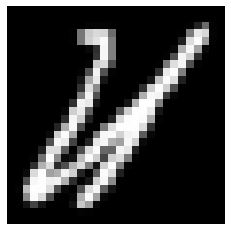

lettera Y classificata come V


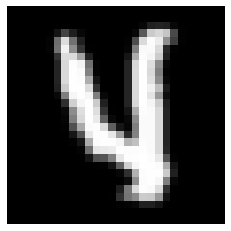

lettera T classificata come R


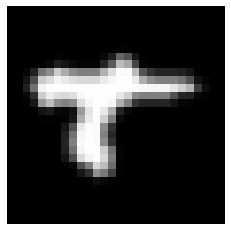

lettera V classificata come U


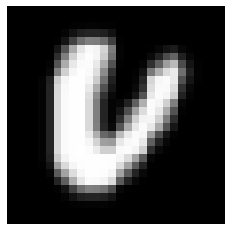

lettera T classificata come Z


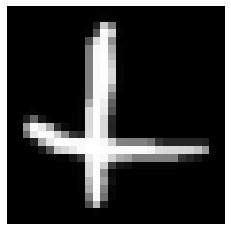

lettera V classificata come U


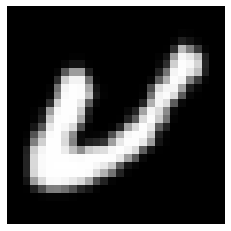

lettera X classificata come T


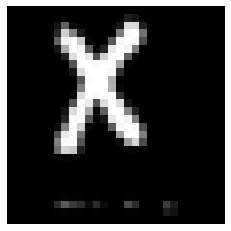

lettera Y classificata come X


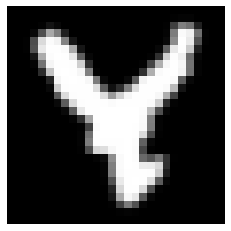

lettera T classificata come Z


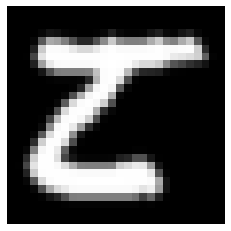

lettera X classificata come V


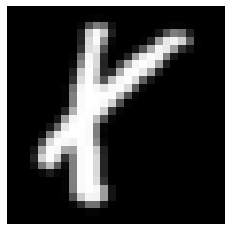

lettera Y classificata come X


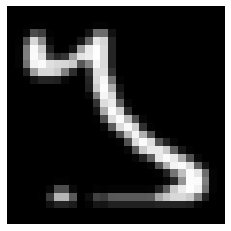

lettera R classificata come P


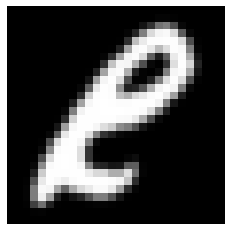

lettera S classificata come T


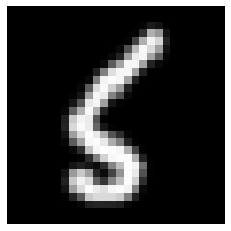

lettera V classificata come Q


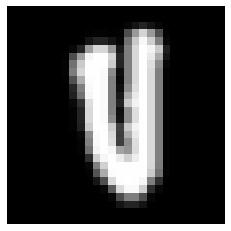

lettera Q classificata come R


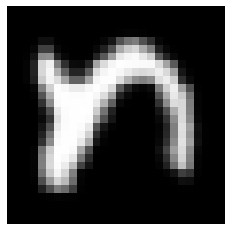

lettera R classificata come P


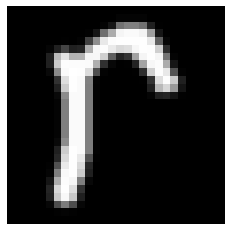

lettera X classificata come V


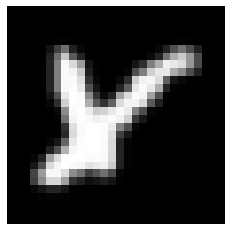

lettera P classificata come R


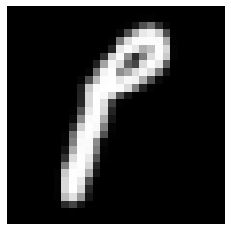

lettera Q classificata come V


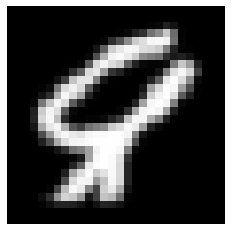

lettera W classificata come U


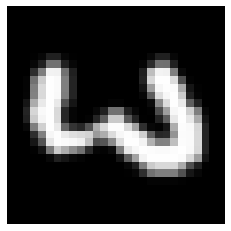

lettera R classificata come P


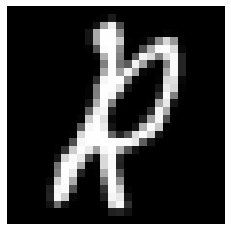

lettera Y classificata come S


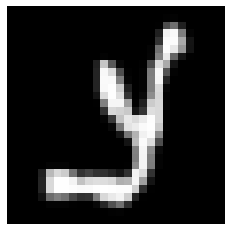

lettera V classificata come R


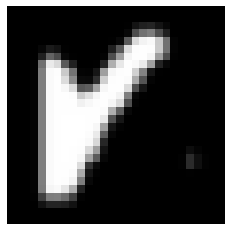

lettera T classificata come V


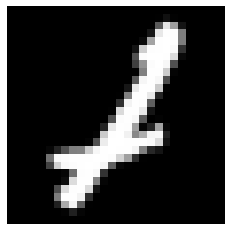

lettera Y classificata come R


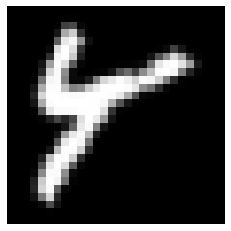

In [22]:
#y_pred = model.predict_classes(x_val)

for i in range(0,len(x_val)):
    if(Y_val[i]!=y_pred[i]):
        print(f"lettera {lettere[Y_val[i]]} classificata come {lettere[y_pred[i]]}")
        plt.imshow(x_val[i].reshape([28,28]), cmap="gray")
        plt.axis('off')
        plt.show()

### AUTOENCODER

In [0]:
encoding_dim = 32 

input_img = Input(shape=(784,))
enc1 = Dense(512, activation = 'relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(enc1)

dec1 = Dense(512, activation="relu")(encoded)
decoded = Dense(784, activation='sigmoid')(dec1)

autoencoder = Model(input_img, decoded)

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-2]
# create the decoder model
decoder = Model(encoded_input, autoencoder.layers[-1](decoder_layer(encoded_input)))

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               402192    
Total params: 837,424
Trainable params: 837,424
Non-trainable params: 0
_________________________________________________________________


In [26]:
network_history=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 10500 samples, validate on 3500 samples
Epoch 1/100
10500/10500 [==============================] - 1s 87us/step - loss: 0.4172 - val_loss: 0.3186
Epoch 2/100
10500/10500 [==============================] - 0s 42us/step - loss: 0.2840 - val_loss: 0.2476
Epoch 3/100
10500/10500 [==============================] - 0s 40us/step - loss: 0.2298 - val_loss: 0.2123
Epoch 4/100
10500/10500 [==============================] - 0s 41us/step - loss: 0.2029 - val_loss: 0.1934
Epoch 5/100
10500/10500 [==============================] - 0s 40us/step - loss: 0.1875 - val_loss: 0.1869
Epoch 6/100
10500/10500 [==============================] - 0s 40us/step - loss: 0.1794 - val_loss: 0.1758
Epoch 7/100
10500/10500 [==============================] - 0s 42us/step - loss: 0.1722 - val_loss: 0.1712
Epoch 8/100
10500/10500 [==============================] - 0s 40us/step - loss: 0.1681 - val_loss: 0.1674
Epoch 9/100
10500/10500 [==============================] - 0s 41us/step - loss: 0.1648 - val_loss: 0.16

In [27]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_val)
decoded_imgs = decoder.predict(encoded_imgs)
print(encoded_imgs.shape)
print(decoded_imgs.shape)


(3500, 32)
(3500, 784)


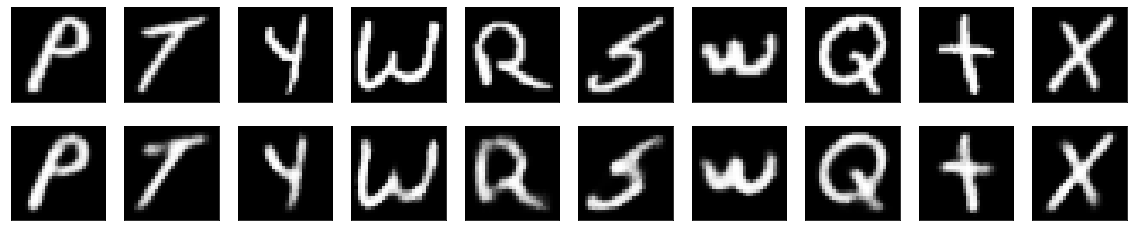

In [28]:
encoded_imgs = encoder.predict(x_val)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### MODELLO FACOLTATIVO

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [59]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 10500 samples, validate on 3500 samples
Epoch 1/100
10500/10500 [==============================] - 2s 203us/step - loss: 0.4085 - acc: 0.6320 - val_loss: 0.3099 - val_acc: 0.6620
Epoch 2/100
10500/10500 [==============================] - 0s 43us/step - loss: 0.2787 - acc: 0.6614 - val_loss: 0.2424 - val_acc: 0.6700
Epoch 3/100
10500/10500 [==============================] - 1s 49us/step - loss: 0.2248 - acc: 0.6674 - val_loss: 0.2058 - val_acc: 0.6731
Epoch 4/100
10500/10500 [==============================] - 0s 47us/step - loss: 0.1971 - acc: 0.6698 - val_loss: 0.1895 - val_acc: 0.6738
Epoch 5/100
10500/10500 [==============================] - 1s 50us/step - loss: 0.1825 - acc: 0.6706 - val_loss: 0.1769 - val_acc: 0.6748
Epoch 6/100
10500/10500 [==============================] - 1s 48us/step - loss: 0.1728 - acc: 0.6710 - val_loss: 0.1696 - val_acc: 0.6752
Epoch 7/100
10500/10500 [==============================] - 0s 48us/step - loss: 0.1659 - acc: 0.6713 - val_loss: 0.1646 - 

In [0]:
from keras.layers import Flatten
num_classes = 11

den = Dense(64, activation='relu')(encoded)
out = Dense(num_classes, activation='softmax')(den)

full_model = Model(input_img,out)


In [0]:
import keras 
for l1,l2 in zip(full_model.layers[:3],autoencoder.layers[0:3]):
    l1.set_weights(l2.get_weights())
for layer in full_model.layers[0:3]:
    layer.trainable = True

In [72]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
classify_train = full_model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=512 ,epochs=100)

Train on 10500 samples, validate on 3500 samples
Epoch 1/100
10500/10500 [==============================] - 2s 174us/step - loss: 0.1639 - acc: 0.9546 - val_loss: 0.3286 - val_acc: 0.9049
Epoch 2/100
10500/10500 [==============================] - 0s 21us/step - loss: 0.1632 - acc: 0.9542 - val_loss: 0.3314 - val_acc: 0.9049
Epoch 3/100
10500/10500 [==============================] - 0s 20us/step - loss: 0.1633 - acc: 0.9547 - val_loss: 0.3334 - val_acc: 0.9040
Epoch 4/100
10500/10500 [==============================] - 0s 20us/step - loss: 0.1631 - acc: 0.9550 - val_loss: 0.3262 - val_acc: 0.9054
Epoch 5/100
10500/10500 [==============================] - 0s 17us/step - loss: 0.1624 - acc: 0.9539 - val_loss: 0.3270 - val_acc: 0.9060
Epoch 6/100
10500/10500 [==============================] - 0s 19us/step - loss: 0.1617 - acc: 0.9556 - val_loss: 0.3267 - val_acc: 0.9066
Epoch 7/100
10500/10500 [==============================] - 0s 19us/step - loss: 0.1614 - acc: 0.9542 - val_loss: 0.3302 - 

In [0]:
predicted_classes = full_model.predict(x_val)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [74]:
cm=confusion_matrix(Y_val,y_pred)
prf=precision_recall_fscore_support(Y_val,y_pred)

print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")

confusion matrix
 [[312   9   6   0   2   1   2   4   0   3   0]
 [  4 297   4   4   3   8   1   5   3   5   1]
 [  6   3 310   0   1   3   4   2   5   1   2]
 [  0   1   3 317   2   1   0   1   2   1   1]
 [  1   3  11   1 294   0   1   0   6   5   5]
 [  0   1   0   1   0 292  16   7   3   0   0]
 [  0   1   2   0   1  14 292   4   0   2   1]
 [  0   0   1   0   0   5   6 296   2   0   0]
 [  0   0   1   0   2   2   5   4 322   9   2]
 [  0   3   3   1   7   7  21   3   7 284   1]
 [  1   0   1   2   4   2   0   3   1   0 188]]
precision
 [0.96296296 0.93396226 0.90643275 0.97239264 0.93037975 0.87164179
 0.83908046 0.89969605 0.91737892 0.91612903 0.93532338]
recall
 [0.92035398 0.88656716 0.91988131 0.96352584 0.89908257 0.9125
 0.92113565 0.95483871 0.92795389 0.84272997 0.93069307]
f-score
 [0.94117647 0.90964778 0.91310751 0.96793893 0.91446345 0.89160305
 0.87819549 0.92644757 0.9226361  0.87789799 0.93300248]


In [75]:
cr=classification_report(Y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       339
           1       0.93      0.89      0.91       335
           2       0.91      0.92      0.91       337
           3       0.97      0.96      0.97       329
           4       0.93      0.90      0.91       327
           5       0.87      0.91      0.89       320
           6       0.84      0.92      0.88       317
           7       0.90      0.95      0.93       310
           8       0.92      0.93      0.92       347
           9       0.92      0.84      0.88       337
          10       0.94      0.93      0.93       202

    accuracy                           0.92      3500
   macro avg       0.92      0.92      0.92      3500
weighted avg       0.92      0.92      0.92      3500

